In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Importamos las tablas a usar en nuestra Análisis Exploratorio

In [6]:
games_lakers = pd.read_csv("ETL/games_lakers_reordenado.csv")

In [7]:
games_lakers

,game_id,season_id,team_id_home,team_abbreviation_home,team_name_home,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,41900402,42019,1610612747,LAL,Los Angeles Lakers,2020-10-02,LAL vs. MIA,W,240,49.0,...,37.0,29.0,2.0,1.0,10.0,23.0,114.0,-10,1,Playoffs
1,41900403,42019,1610612748,MIA,Miami Heat,2020-10-04,MIA vs. LAL,W,240,41.0,...,43.0,23.0,8.0,2.0,20.0,22.0,104.0,-11,1,Playoffs
2,41900404,42019,1610612748,MIA,Miami Heat,2020-10-06,MIA vs. LAL,L,240,32.0,...,42.0,25.0,5.0,4.0,15.0,14.0,102.0,6,1,Playoffs
3,41900405,42019,1610612747,LAL,Los Angeles Lakers,2020-10-09,LAL vs. MIA,L,240,38.0,...,35.0,26.0,7.0,3.0,13.0,19.0,111.0,3,1,Playoffs
4,41900406,42019,1610612748,MIA,Miami Heat,2020-10-11,MIA vs. LAL,L,240,35.0,...,46.0,23.0,5.0,4.0,14.0,22.0,106.0,13,1,Playoffs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,42200236,42022,1610612747,LAL,Los Angeles Lakers,2023-05-12,LAL vs. GSW,W,240,39.0,...,53.0,25.0,3.0,2.0,11.0,30.0,101.0,-21,1,Playoffs
275,42200311,42022,1610612743,DEN,Denver Nuggets,2023-05-16,DEN vs. LAL,W,240,50.0,...,30.0,30.0,6.0,4.0,7.0,21.0,126.0,-6,1,Playoffs
276,42200312,42022,1610612743,DEN,Denver Nuggets,2023-05-18,DEN vs. LAL,W,240,39.0,...,40.0,26.0,10.0,7.0,12.0,19.0,103.0,-5,1,Playoffs
277,42200313,42022,1610612747,LAL,Los Angeles Lakers,2023-05-20,LAL vs. DEN,L,240,38.0,...,39.0,30.0,7.0,1.0,6.0,19.0,119.0,11,1,Playoffs


In [8]:
lakers_21_24 = pd.read_csv("ETL/lakers_21_24.csv")

In [9]:
lakers_21_24

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,type_season,season_year
0,14,Carmelo Anthony,PF,37,LAL,69,3,26.0,4.6,10.5,...,3.3,4.2,1.0,0.7,0.8,0.9,2.4,13.3,regular,2021-2022
1,18,Trevor Ariza,SF,36,LAL,24,11,19.3,1.4,4.1,...,3.0,3.4,1.1,0.5,0.3,0.5,0.8,4.0,regular,2021-2022
2,19,D.J. Augustin,PG,34,LAL,21,0,17.8,1.9,4.1,...,1.1,1.3,1.6,0.3,0.0,0.5,1.0,5.3,regular,2021-2022
3,39,Kent Bazemore,SF,32,LAL,39,14,14.0,1.2,3.6,...,1.4,1.8,0.9,0.6,0.2,0.5,1.8,3.4,regular,2021-2022
4,63,Avery Bradley,SG,31,LAL,62,45,22.7,2.4,5.6,...,1.7,2.2,0.8,0.9,0.1,0.6,1.9,6.4,regular,2021-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,93,LeBron James,PF,39,LAL,5,5,40.8,11.2,19.8,...,6.0,6.8,8.8,2.4,1.0,3.8,2.2,27.8,playoffs,2023-2024
91,162,Taurean Prince,PF,29,LAL,5,0,22.2,2.4,5.8,...,2.2,2.4,0.6,0.2,0.4,0.2,1.8,7.4,playoffs,2023-2024
92,166,Austin Reaves,SG,25,LAL,5,5,34.8,6.0,12.6,...,2.8,3.8,3.6,1.4,0.6,0.8,1.6,16.8,playoffs,2023-2024
93,174,D'Angelo Russell,PG,27,LAL,5,5,37.0,5.6,14.6,...,2.6,2.8,4.2,0.8,0.2,1.8,1.2,14.2,playoffs,2023-2024


### Gráficos de EDA de la tabla games_lakers

- Grafico de calor para comparar las victorias y derrotas de LAL como visitante y como local

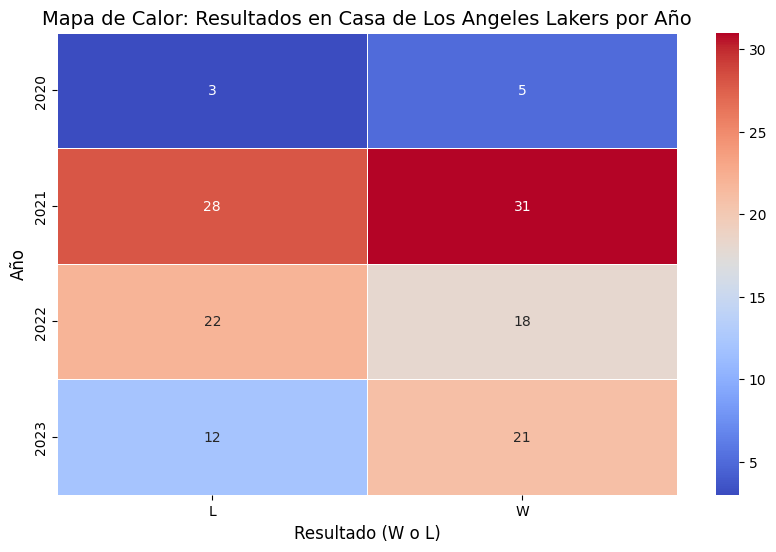

In [15]:
# Asegúrate de que game_date esté en formato datetime y extrae el año
games_lakers['game_date'] = pd.to_datetime(games_lakers['game_date'])
games_lakers['year'] = games_lakers['game_date'].dt.year

# Filtrar solo los registros donde team_name_home sea "Los Angeles Lakers"
lakers_home_games = games_lakers[games_lakers['team_name_home'] == 'Los Angeles Lakers']

# Crear una tabla de contingencia con wl_home y año
heatmap_home_data = pd.crosstab(lakers_home_games['year'], lakers_home_games['wl_home'])

# Crear un mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_home_data, annot=True, cmap='coolwarm', fmt='d', linewidths=0.5)
plt.title('Mapa de Calor: Resultados en Casa de Los Angeles Lakers por Año', fontsize=14)
plt.xlabel('Resultado (W o L)', fontsize=12)
plt.ylabel('Año', fontsize=12)
plt.show()


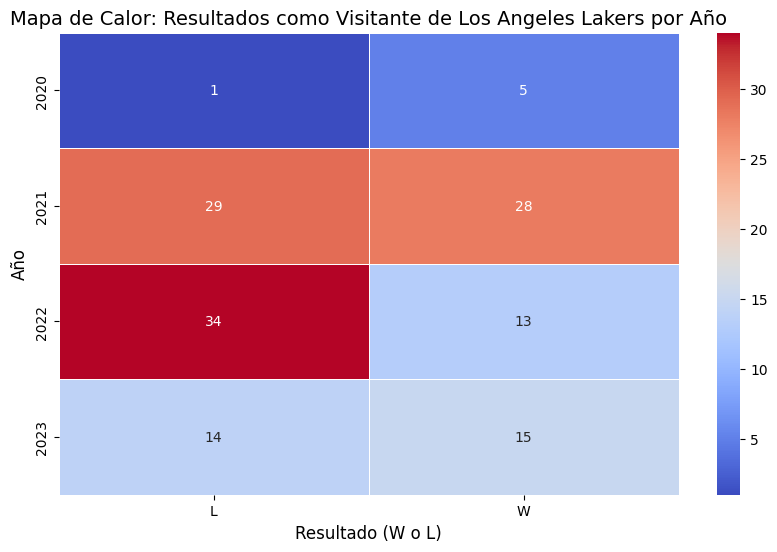

In [16]:
# Filtrar solo los registros donde team_name_away sea "Los Angeles Lakers"
lakers_away_games = games_lakers[games_lakers['team_name_away'] == 'Los Angeles Lakers']

# Crear una tabla de contingencia con wl_away y año
heatmap_away_data = pd.crosstab(lakers_away_games['year'], lakers_away_games['wl_away'])

# Crear un mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_away_data, annot=True, cmap='coolwarm', fmt='d', linewidths=0.5)
plt.title('Mapa de Calor: Resultados como Visitante de Los Angeles Lakers por Año', fontsize=14)
plt.xlabel('Resultado (W o L)', fontsize=12)
plt.ylabel('Año', fontsize=12)
plt.show()

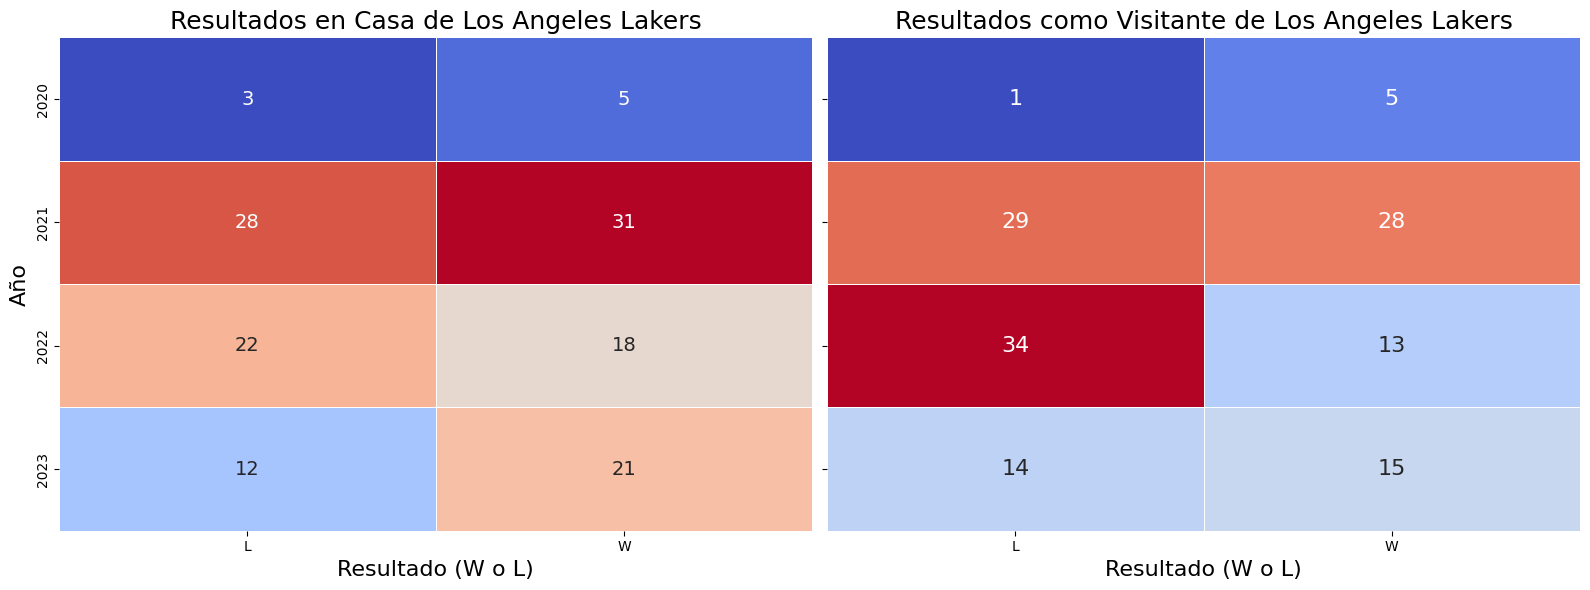

In [17]:
# Crear subplots para los mapas de calor
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Mapa de calor: Resultados en casa
sns.heatmap(heatmap_home_data, annot=True, fmt='d', cmap='coolwarm', cbar=False, ax=axes[0], linewidths=0.5, 
            annot_kws={"size": 14})  # Ajustar tamaño de los números
axes[0].set_title('Resultados en Casa de Los Angeles Lakers', fontsize=18)
axes[0].set_xlabel('Resultado (W o L)', fontsize=16)
axes[0].set_ylabel('Año', fontsize=16)

# Mapa de calor: Resultados como visitante
sns.heatmap(heatmap_away_data, annot=True, fmt='d', cmap='coolwarm', cbar=False, ax=axes[1], linewidths=0.5, 
            annot_kws={"size": 16})  # Ajustar tamaño de los números
axes[1].set_title('Resultados como Visitante de Los Angeles Lakers', fontsize=18)
axes[1].set_xlabel('Resultado (W o L)', fontsize=16)
axes[1].set_ylabel('')  # Evitar repetición del título del eje y

# Ajustar el diseño del gráfico
plt.tight_layout()
plt.show()


- Gráfico de barra donde se aprecia una comparación entre promedio de distintas metricas cuando LAL juega como local y como visitante

<Figure size 1400x700 with 0 Axes>

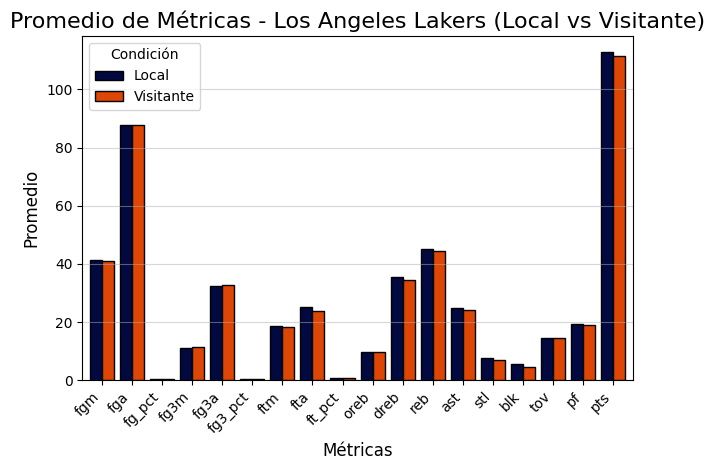

In [18]:
# Filtrar los juegos donde team_name_home y team_name_away sean "Los Angeles Lakers"
lakers_home_games = games_lakers[games_lakers['team_name_home'] == 'Los Angeles Lakers']
lakers_away_games = games_lakers[games_lakers['team_name_away'] == 'Los Angeles Lakers']

# Seleccionar las columnas relevantes para casa y visitante
columns_home = [
    'fgm_home', 'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home', 'fg3_pct_home',
    'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home', 'dreb_home', 'reb_home',
    'ast_home', 'stl_home', 'blk_home', 'tov_home', 'pf_home', 'pts_home'
]
columns_away = [
    'fgm_away', 'fga_away', 'fg_pct_away', 'fg3m_away', 'fg3a_away', 'fg3_pct_away',
    'ftm_away', 'fta_away', 'ft_pct_away', 'oreb_away', 'dreb_away', 'reb_away',
    'ast_away', 'stl_away', 'blk_away', 'tov_away', 'pf_away', 'pts_away'
]

# Calcular los promedios
averages_home = lakers_home_games[columns_home].mean()
averages_away = lakers_away_games[columns_away].mean()

# Renombrar las columnas para que sean comparables
averages_home.index = [col.replace('_home', '') for col in averages_home.index]
averages_away.index = [col.replace('_away', '') for col in averages_away.index]

# Crear un DataFrame combinado
averages_combined = pd.DataFrame({'Local': averages_home, 'Visitante': averages_away})

# Crear un gráfico de barras agrupadas
plt.figure(figsize=(14, 7))
averages_combined.plot(kind='bar', width=0.8, color=['#020940', '#dd4605'], edgecolor='black')
plt.title('Promedio de Métricas - Los Angeles Lakers (Local vs Visitante)', fontsize=16)
plt.xlabel('Métricas', fontsize=12)
plt.ylabel('Promedio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Condición')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\richa\AppData\Local\Temp\ipykernel_17736\2406741382.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=away_team_counts, x='count', y='team_name_away', palette="Oranges")


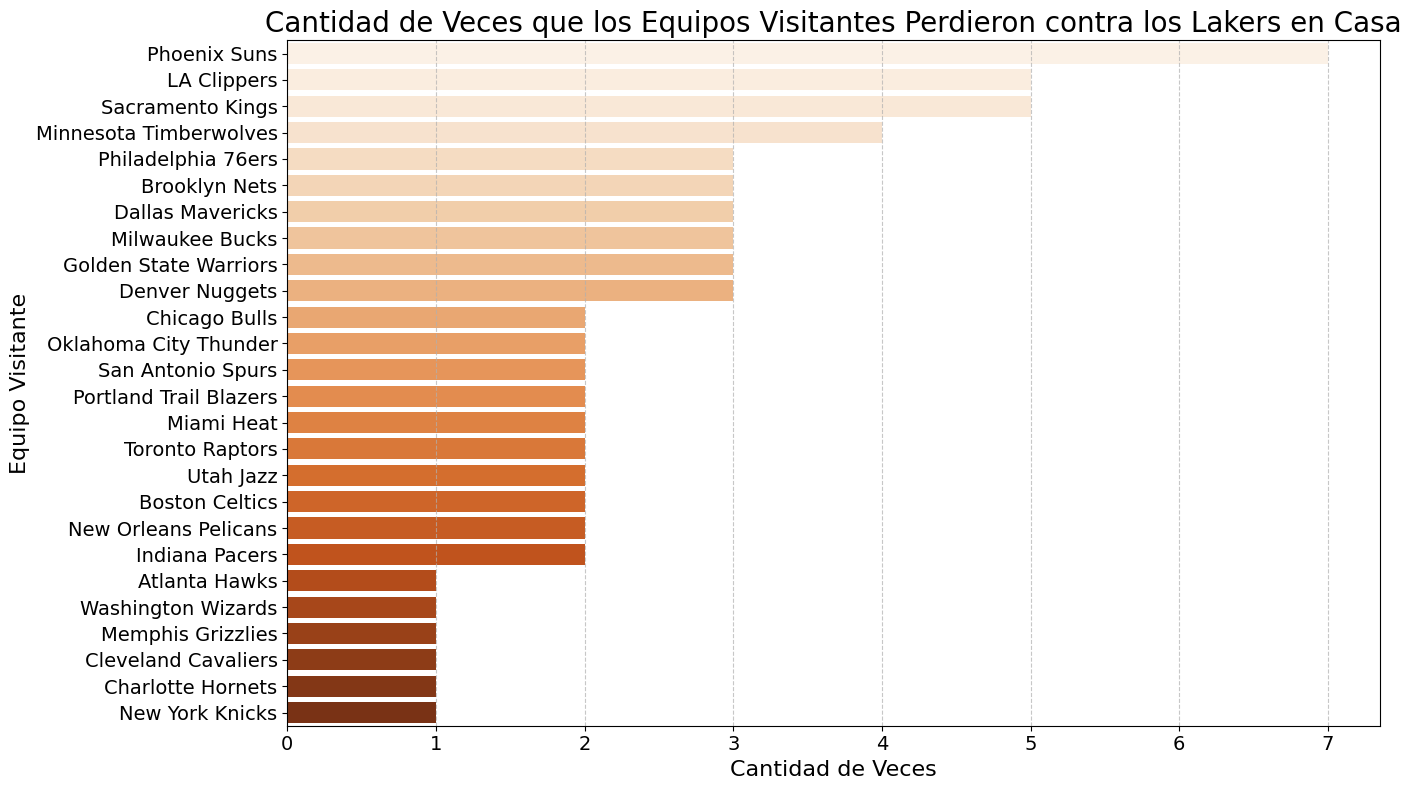

In [19]:
# Filtrar los datos según las condiciones dadas
lakers_lost = games_lakers[(games_lakers['team_name_home'] == 'Los Angeles Lakers') & (games_lakers['wl_home'] == 'L')]

# Contar las ocurrencias de cada equipo en team_name_away
away_team_counts = lakers_lost['team_name_away'].value_counts().reset_index()
away_team_counts.columns = ['team_name_away', 'count']

# Crear el gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(data=away_team_counts, x='count', y='team_name_away', palette="Oranges")
plt.title("Cantidad de Veces que los Equipos Visitantes Perdieron contra los Lakers en Casa", fontsize=20)
plt.xlabel("Cantidad de Veces", fontsize=16)
plt.ylabel("Equipo Visitante", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

### Gráficos de EDA de la tabla lakers_21_24

- Gráfico de barras que muestra el promedio de LAL de diferentes Métricas por temporada

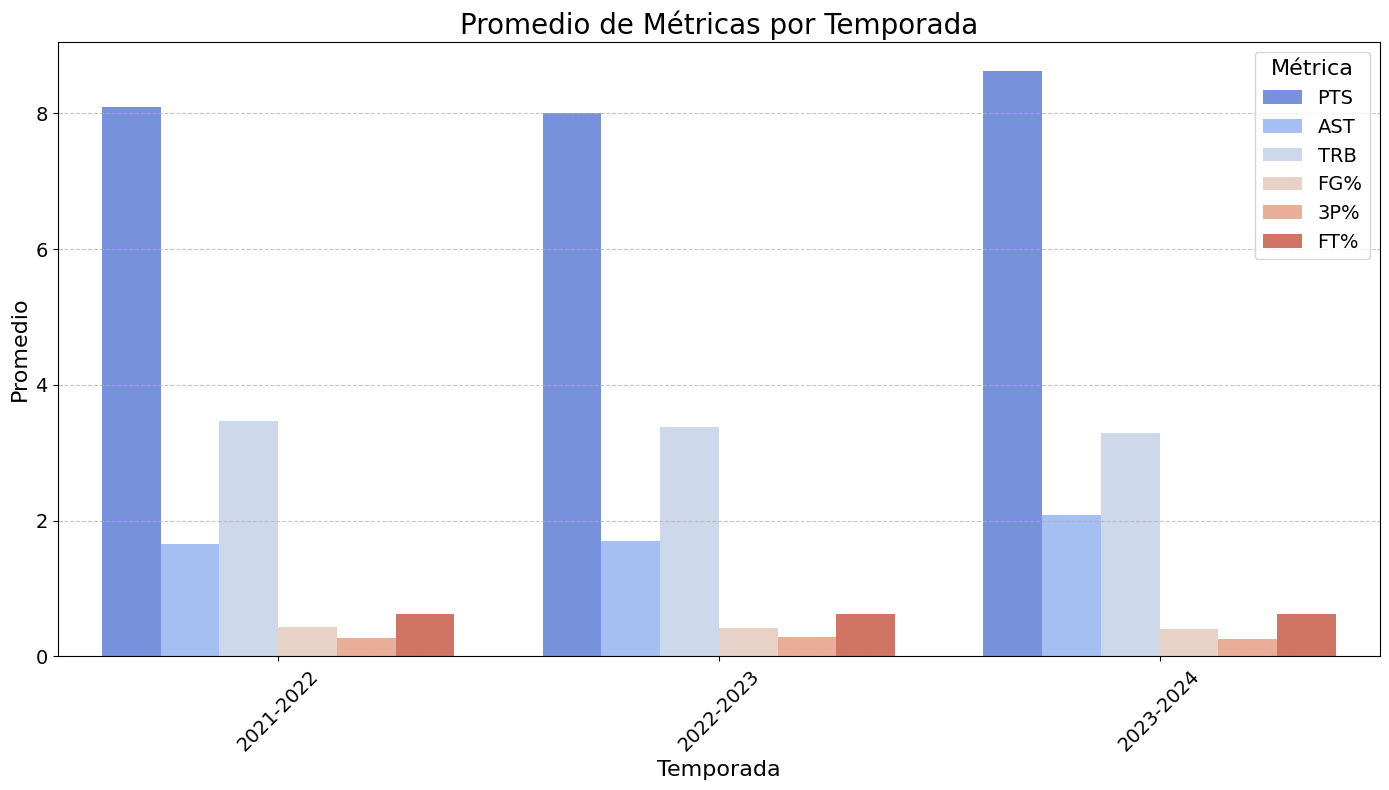

In [21]:
# Seleccionar métricas relevantes
metrics = ["PTS", "AST", "TRB", "FG%", "3P%", "FT%"]

# Calcular promedios por temporada
average_metrics = lakers_21_24.groupby("season_year")[metrics].mean().reset_index()

# Transformar los datos para facilitar la visualización
average_metrics_melted = average_metrics.melt(id_vars=["season_year"], 
                                               var_name="Métrica", 
                                               value_name="Promedio")

# Crear el gráfico con ajustes de tamaño de letra
plt.figure(figsize=(14, 8))
sns.barplot(data=average_metrics_melted, x="season_year", y="Promedio", hue="Métrica", palette="coolwarm")
plt.title("Promedio de Métricas por Temporada", fontsize=20)
plt.xlabel("Temporada", fontsize=16)
plt.ylabel("Promedio", fontsize=16)
plt.legend(title="Métrica", fontsize=14, title_fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

# Ajustes de cuadrícula y espacio
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

- Gráfico de Barras que muestra el promedio de eficiencia de tiros filtrados por la posición que ocupan los jugadores

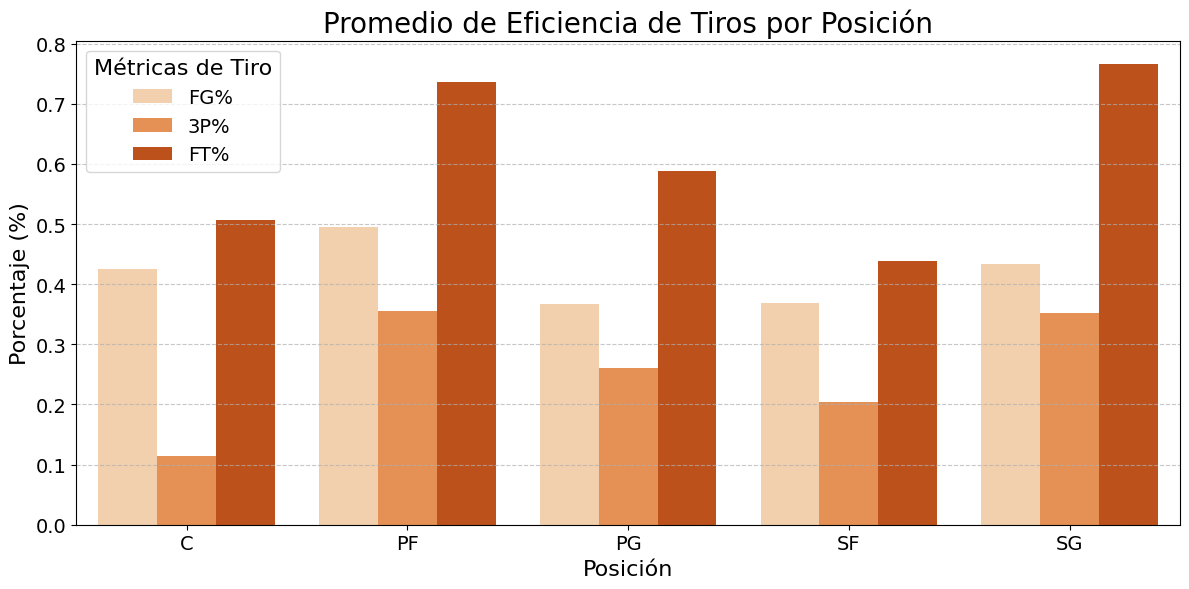

In [22]:
# Seleccionar las columnas relevantes
columns = ["Pos", "FG%", "3P%", "FT%"]

# Calcular el promedio de eficiencia de tiros por posición
efficiency_by_pos = lakers_21_24.groupby("Pos")[["FG%", "3P%", "FT%"]].mean().reset_index()

# Graficar el promedio de eficiencia
efficiency_by_pos_melted = efficiency_by_pos.melt(id_vars=["Pos"], value_vars=["FG%", "3P%", "FT%"],
                                                  var_name="Métrica", value_name="Porcentaje")

plt.figure(figsize=(12, 6))
sns.barplot(data=efficiency_by_pos_melted, x="Pos", y="Porcentaje", hue="Métrica", palette="Oranges")

# Aumentar tamaño de las letras
plt.title("Promedio de Eficiencia de Tiros por Posición", fontsize=20)
plt.xlabel("Posición", fontsize=16)
plt.ylabel("Porcentaje (%)", fontsize=16)
plt.legend(title="Métricas de Tiro", fontsize=14, title_fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Agregar cuadrícula y mostrar
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

- Diágrama de dispersión que relaciona la Edad de los jugadores y los puntos realizados en las temporadas 21-24. Se puede apreciar también la posicion que ocupan dichos jugadores

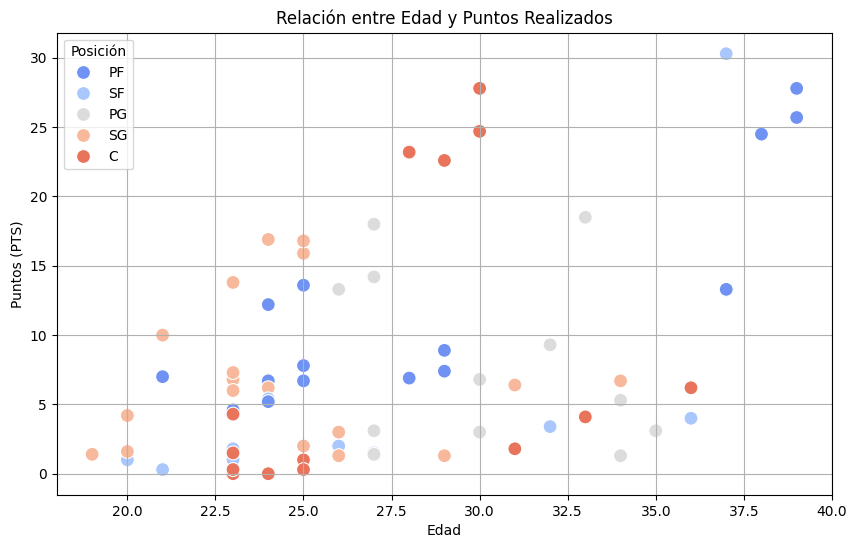

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=lakers_21_24, x="Age", y="PTS", hue="Pos", palette="coolwarm", s=100)
plt.title("Relación entre Edad y Puntos Realizados")
plt.xlabel("Edad")
plt.ylabel("Puntos (PTS)")
plt.legend(title="Posición")
plt.grid(True)
plt.show()

- Gráfico de barras horizontales que muestra la eficiencia de tiro de los 5 mejores anotadores etre las temporadas que abaran 2021-204

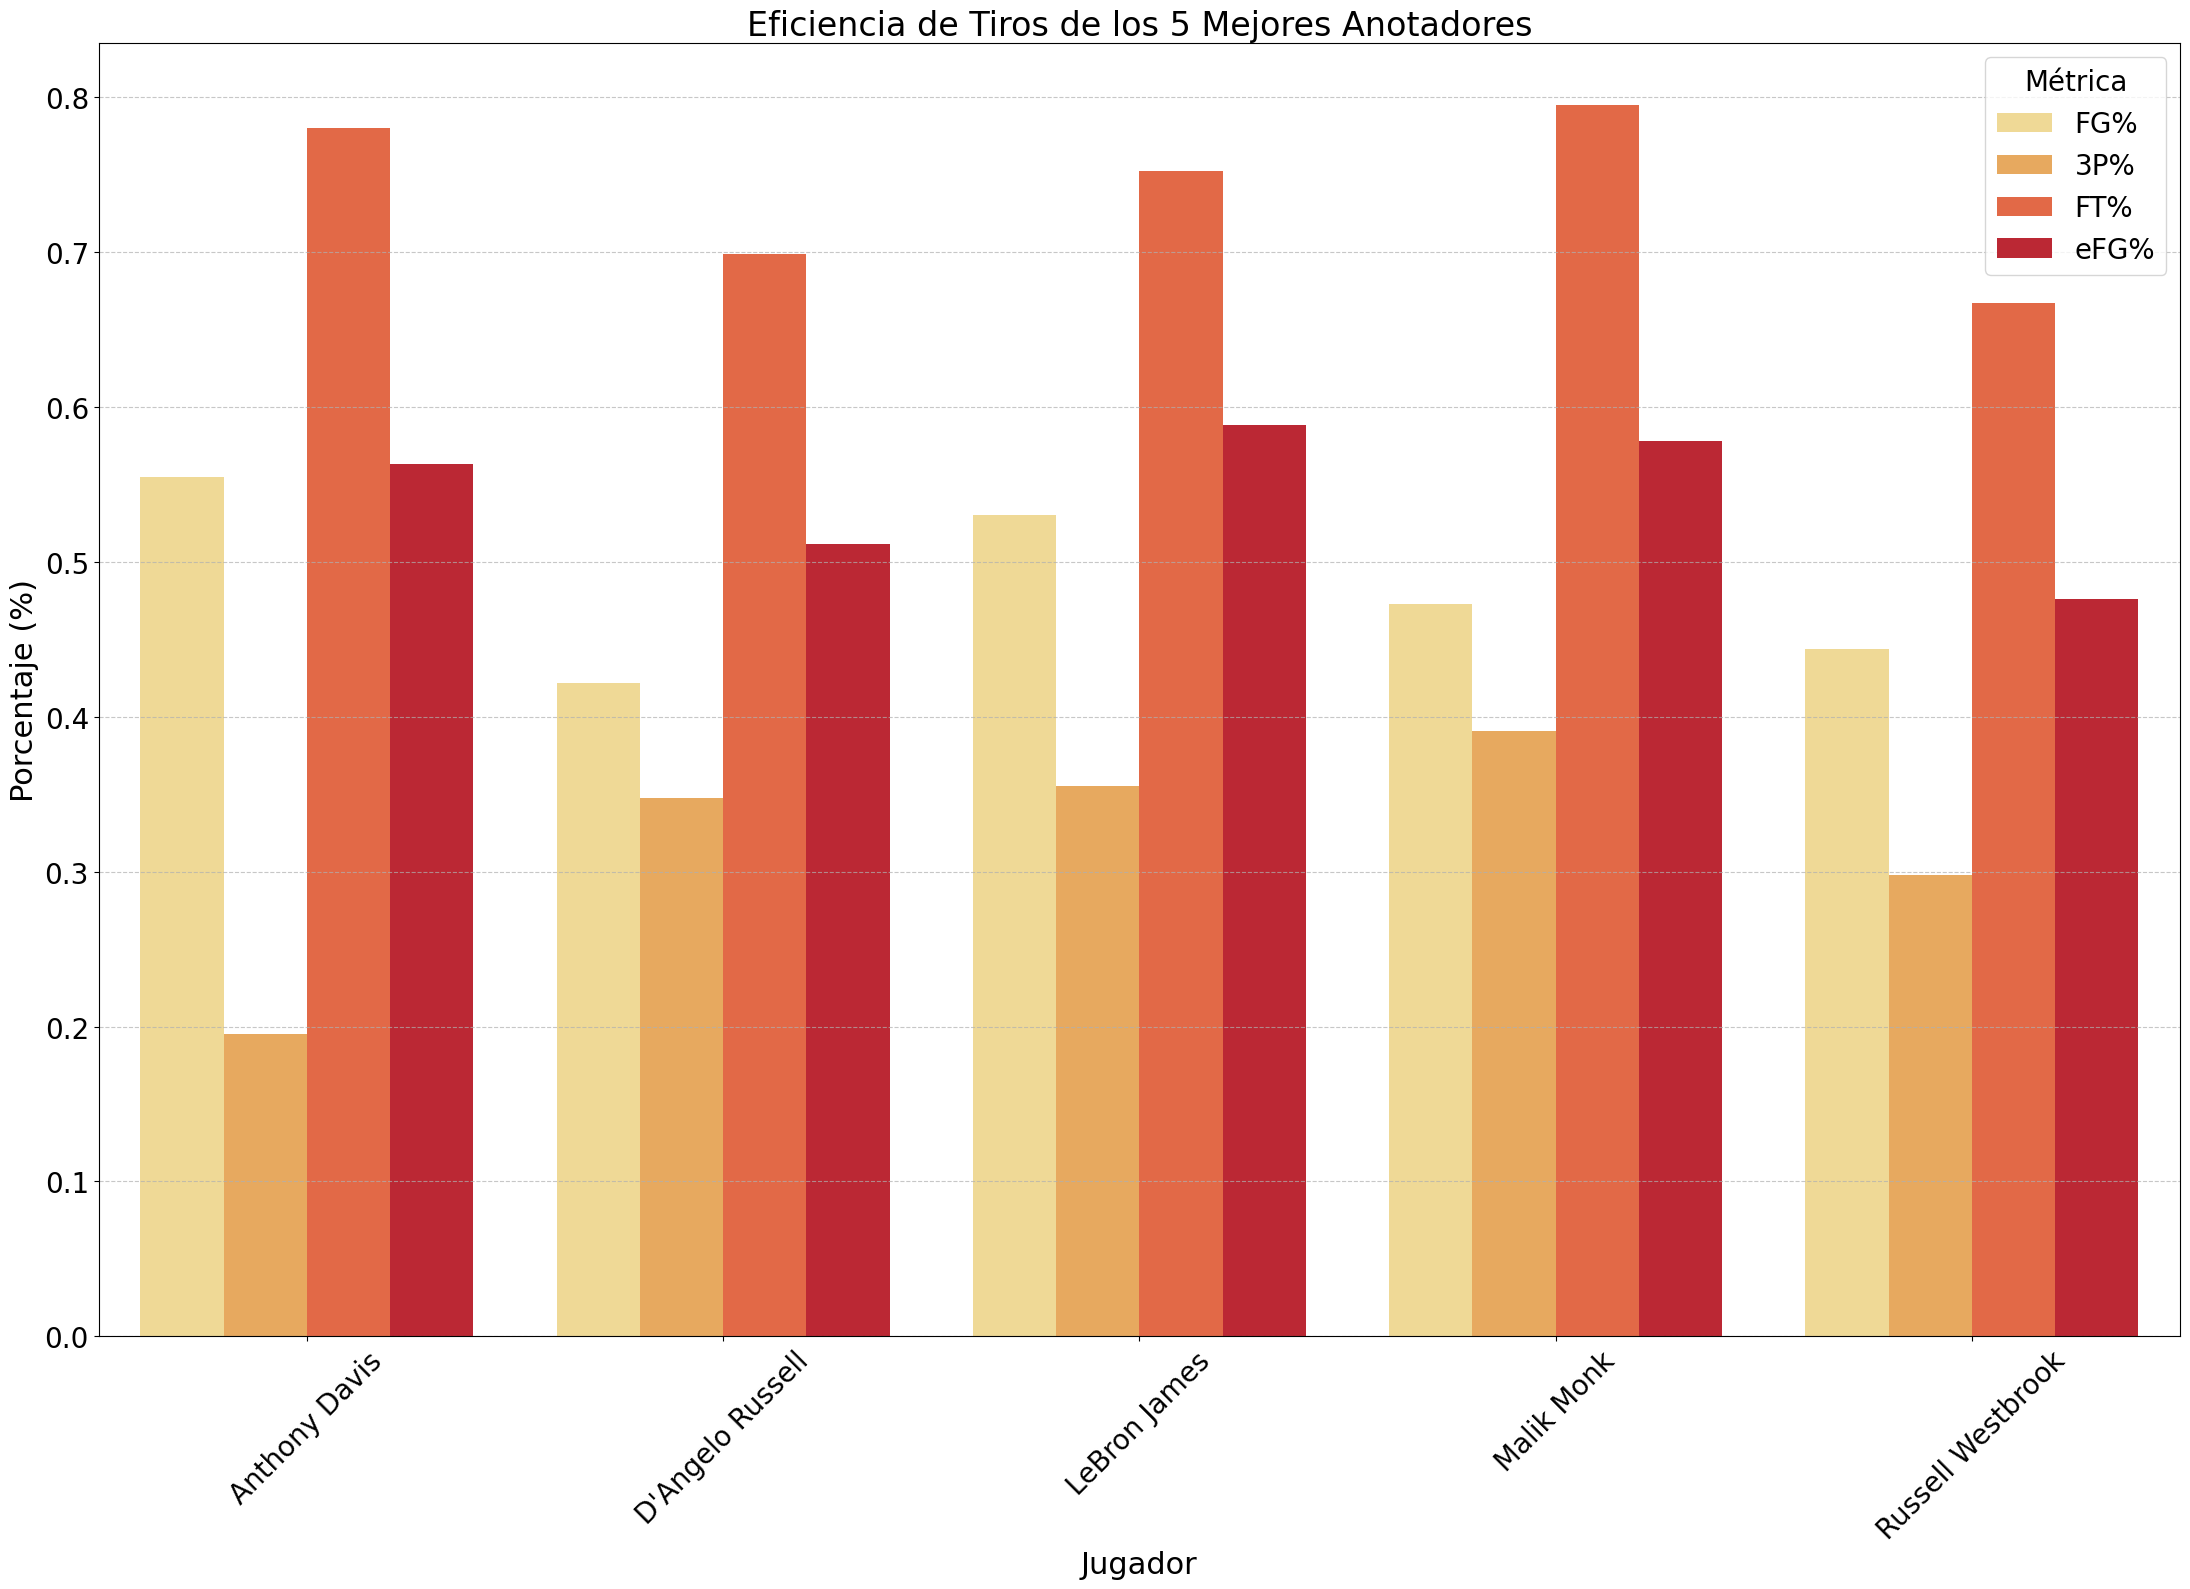

In [ ]:
# Calcular el promedio de puntos por jugador y seleccionar el top 5
top_5_scorers = lakers_21_24.groupby("Player")["PTS"].mean().nlargest(5).index
top_5_data = lakers_21_24[lakers_21_24["Player"].isin(top_5_scorers)]

# Elegir métricas de eficiencia relevantes
efficiency_metrics = ["FG%", "3P%", "FT%", "eFG%"]

# Transformar los datos para graficar
top_5_efficiency = top_5_data.groupby("Player")[efficiency_metrics].mean().reset_index()
top_5_efficiency_melted = top_5_efficiency.melt(id_vars=["Player"], 
                                                value_vars=efficiency_metrics, 
                                                var_name="Métrica", 
                                                value_name="Valor")

# Crear el gráfico de barras agrupadas horizontal
plt.figure(figsize=(22, 16))
sns.barplot(data=top_5_efficiency_melted, y="Player", x="Valor", hue="Métrica", palette="YlOrRd")

plt.title("Eficiencia de Tiros de los 5 Mejores Anotadores", fontsize=24)  # Título más grande
plt.ylabel("Porcentaje (%)", fontsize=22)  
plt.legend(title="Métrica", fontsize=20, title_fontsize=20) 
plt.xticks(fontsize=20, rotation=45)  
plt.yticks(fontsize=20)

# Cuadrícula y diseño
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

- Gráfico de barras horizontales que muestra la eficiencia de tiro de los 5 peores anotadores etre las temporadas que abarcan 2021-204

In [ ]:
# Calcular el promedio de puntos por jugador y seleccionar el top 5 de los peores jugadores
bottom_5_scorers = lakers_21_24.groupby("Player")["PTS"].mean().nsmallest(5).index
bottom_5_data = lakers_21_24[lakers_21_24["Player"].isin(bottom_5_scorers)]

# Transformar los datos para graficar
bottom_5_efficiency = bottom_5_data.groupby("Player")[efficiency_metrics].mean().reset_index()
bottom_5_efficiency_melted = bottom_5_efficiency.melt(id_vars=["Player"], 
                                                      value_vars=efficiency_metrics, 
                                                      var_name="Métrica", 
                                                      value_name="Valor")

# Crear el gráfico de barras agrupadas horizontal
plt.figure(figsize=(22, 16))
sns.barplot(data=bottom_5_efficiency_melted, y="Player", x="Valor", hue="Métrica", palette="YlGnBu")

# Diseño
plt.title("Eficiencia de Tiros de los 5 Peores Anotadores", fontsize=24)  
plt.xlabel("Jugador", fontsize=22)  
plt.ylabel("Porcentaje (%)", fontsize=22) 
plt.legend(title="Métrica", fontsize=20, title_fontsize=20, loc='lower right')
plt.xticks(fontsize=20, rotation=45)  
plt.yticks(fontsize=20)  

# Cuadrícula y diseño
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


- Matriz de correlación que muestra las relaciones entre diferentes métricas clave de desempeño para los Los Angeles Lakers.

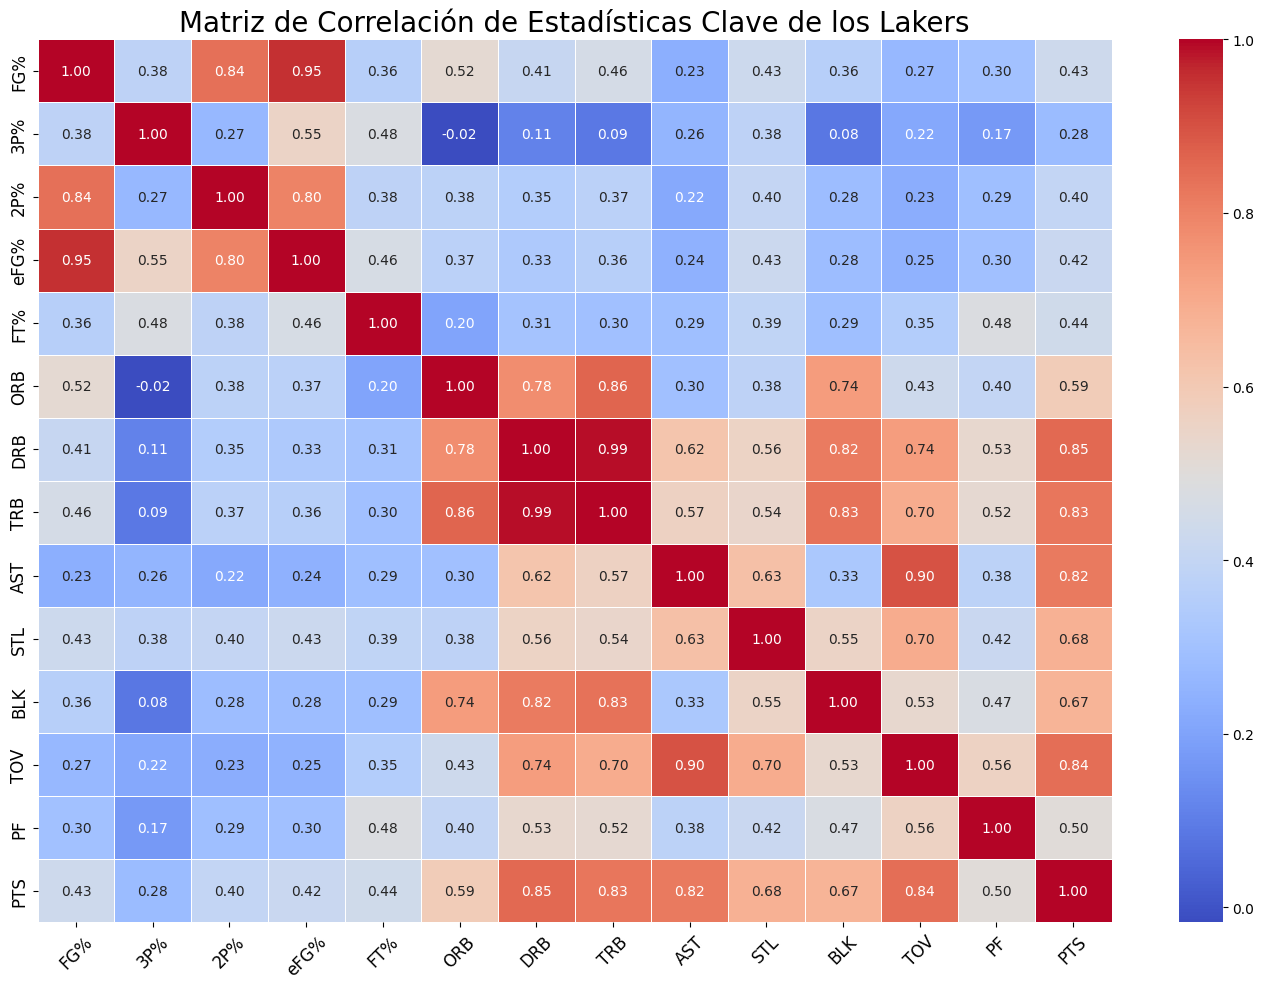

In [27]:
# Filtrar solo las columnas deseadas
selected_columns = ["FG%", "3P%", "2P%", "eFG%", "FT%", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS"]
filtered_data = lakers_21_24[selected_columns]

# Calcular la matriz de correlación
correlation_matrix = filtered_data.corr()

# Crear el heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación de Estadísticas Clave de los Lakers", fontsize=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

- Diágrama de dispersión que explora la relacióes entre dos métricas que mostraron tener alta relación en la Matriz de correlación.

<Axes: xlabel='DRB', ylabel='PTS'>

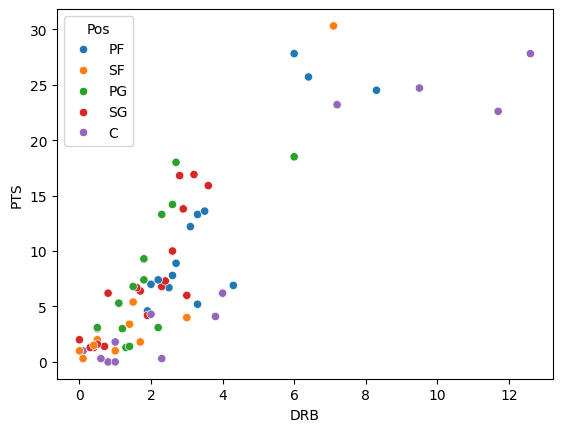

In [29]:
sns.scatterplot(data=lakers_21_24, x="DRB", y="PTS", hue="Pos")

<Axes: xlabel='TRB', ylabel='PTS'>

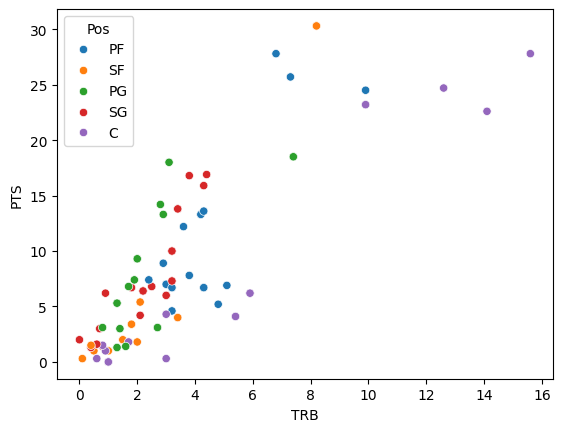

In [30]:
sns.scatterplot(data=lakers_21_24, x="TRB", y="PTS", hue="Pos")

- Grafico barras horizontales del top de Jugadores de LAL con mejor promedio de puntos, triples y asistencias.

In [ ]:
# Seleccionar el top 3 de jugadores para cada métrica
top_3_pts = lakers_21_24.groupby("Player")["PTS"].mean().nlargest(3).index
top_3_3p = lakers_21_24.groupby("Player")["3P"].mean().nlargest(3).index
top_3_ast = lakers_21_24.groupby("Player")["AST"].mean().nlargest(3).index

# Consolidar los datos del top 3 de cada métrica
top_players = set(top_3_pts).union(set(top_3_3p)).union(set(top_3_ast))
top_data = lakers_21_24[lakers_21_24["Player"].isin(top_players)]

# Crear un DataFrame con los promedios
metrics = ["PTS", "3P", "AST"]
top_metrics = top_data.groupby("Player")[metrics].mean().reset_index()
top_metrics_melted = top_metrics.melt(id_vars=["Player"], 
                                      value_vars=metrics, 
                                      var_name="Métrica", 
                                      value_name="Valor")

# Crear el gráfico de barras agrupadas horizontal
plt.figure(figsize=(16, 10))
sns.barplot(data=top_metrics_melted, y="Player", x="Valor", hue="Métrica", palette="Blues")

# Personalizar etiquetas y diseño
plt.title("Top de Jugadores en Puntos, Triples y Asistencias", fontsize=20)
plt.ylabel("Jugador", fontsize=16)
plt.xlabel("Promedio", fontsize=16)
plt.legend(title="Métrica", fontsize=12, title_fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.grid(axis="x",  linestyle="",alpha=0.7)
plt.tight_layout()
plt.show()

- Grafico de Barras horizontales de Top de Jugadores con los peores promedios en puntos, triples y asistencias. 

In [ ]:
# Seleccionar el bottom 3 de jugadores para cada métrica
bottom_3_pts = lakers_21_24.groupby("Player")["PTS"].mean().nsmallest(3).index
bottom_3_3p = lakers_21_24.groupby("Player")["3P"].mean().nsmallest(3).index
bottom_3_ast = lakers_21_24.groupby("Player")["AST"].mean().nsmallest(3).index

# Consolidar los datos del bottom 3 de cada métrica
bottom_players = set(bottom_3_pts).union(set(bottom_3_3p)).union(set(bottom_3_ast))
bottom_data = lakers_21_24[lakers_21_24["Player"].isin(bottom_players)]

# Crear un DataFrame con los promedios
metrics = ["PTS", "3P", "AST"]
bottom_metrics = bottom_data.groupby("Player")[metrics].mean().reset_index()
bottom_metrics_melted = bottom_metrics.melt(id_vars=["Player"], 
                                            value_vars=metrics, 
                                            var_name="Métrica", 
                                            value_name="Valor")

# Crear el gráfico de barras agrupadas horizontal
plt.figure(figsize=(16, 10))
sns.barplot(data=bottom_metrics_melted, y="Player", x="Valor", hue="Métrica", palette="YlOrRd")

# Personalizar etiquetas y diseño
plt.title("Jugadores con Peor Promedio en Puntos, Triples y Asistencias", fontsize=20)
plt.ylabel("Jugador", fontsize=16)
plt.xlabel("Promedio", fontsize=16)
plt.legend(title="Métrica", fontsize=12, title_fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.grid(axis="x", linestyle="", alpha=0.7)
plt.tight_layout()
plt.show()


- Grafico de barras horizontales de Jugadores con peor desempeño en metricas defensivas.

In [ ]:
# Seleccionar el bottom 3 de jugadores para cada métrica
bottom_3_drb = lakers_21_24.groupby("Player")["DRB"].mean().nsmallest(3).index
bottom_3_blk = lakers_21_24.groupby("Player")["BLK"].mean().nsmallest(3).index
bottom_3_stl = lakers_21_24.groupby("Player")["STL"].mean().nsmallest(3).index

# Consolidar los datos del bottom 3 de cada métrica
bottom_players = set(bottom_3_drb).union(set(bottom_3_blk)).union(set(bottom_3_stl))
bottom_data = lakers_21_24[lakers_21_24["Player"].isin(bottom_players)]

# Crear un DataFrame con los promedios
metrics = ["DRB", "BLK", "STL"]
bottom_metrics = bottom_data.groupby("Player")[metrics].mean().reset_index()
bottom_metrics_melted = bottom_metrics.melt(id_vars=["Player"], 
                                            value_vars=metrics, 
                                            var_name="Métrica", 
                                            value_name="Valor")

# Crear el gráfico de barras agrupadas horizontal
plt.figure(figsize=(16, 10))
sns.barplot(data=bottom_metrics_melted, y="Player", x="Valor", hue="Métrica", palette="YlOrRd")

# Personalizar etiquetas y diseño
plt.title("Jugadores con Peor Promedio en Rebotes Defensivos, Bloqueos y Robos", fontsize=20)
plt.ylabel("Jugador", fontsize=16)
plt.xlabel("Promedio", fontsize=16)
plt.legend(title="Métrica", fontsize=12, title_fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.grid(axis="x", linestyle="", alpha=0.7)
plt.tight_layout()
plt.show()

- Gráfico de barras horizontales de los Jugadores con mejor promedio en metricas defensivas.

In [ ]:
# Seleccionar el top 3 de jugadores para cada métrica
top_3_drb = lakers_21_24.groupby("Player")["DRB"].mean().nlargest(3).index
top_3_blk = lakers_21_24.groupby("Player")["BLK"].mean().nlargest(3).index
top_3_stl = lakers_21_24.groupby("Player")["STL"].mean().nlargest(3).index

# Consolidar los datos del top 3 de cada métrica
top_players = set(top_3_drb).union(set(top_3_blk)).union(set(top_3_stl))
top_data = lakers_21_24[lakers_21_24["Player"].isin(top_players)]

# Crear un DataFrame con los promedios
metrics = ["DRB", "BLK", "STL"]
top_metrics = top_data.groupby("Player")[metrics].mean().reset_index()
top_metrics_melted = top_metrics.melt(id_vars=["Player"], 
                                      value_vars=metrics, 
                                      var_name="Métrica", 
                                      value_name="Valor")

# Crear el gráfico de barras agrupadas horizontal
plt.figure(figsize=(16, 10))
sns.barplot(data=top_metrics_melted, y="Player", x="Valor", hue="Métrica", palette="Blues")

# Personalizar etiquetas y diseño
plt.title("Jugadores con Mejor Promedio en Rebotes Defensivos, Bloqueos y Robos", fontsize=22)
plt.ylabel("Jugador", fontsize=18)
plt.xlabel("Promedio", fontsize=20)
plt.legend(title="Métrica", fontsize=18, title_fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.grid(axis="x", linestyle="", alpha=0.7)
plt.tight_layout()
plt.show()